Anjana Sowmya Puvvada

Suid-6788587001


In [1]:
#Libraries
import requests
import json
import pandas as pd

In [2]:

# Set up the Spotify API credentials and playlist ID
client_id = "ef75d5be831e4318b0d95fe91b4270c9"
client_secret = "a91c0f74598243e3abaf14c0dc46a0a9"
playlist_id = "37i9dQZF1DXaQm3ZVg9Z2X"

# Get access token using client credentials flow
token_url = "https://accounts.spotify.com/api/token"
token_params = {"grant_type": "client_credentials"}
token_response = requests.post(token_url, auth=(client_id, client_secret), data=token_params)
token_data = token_response.json()
access_token = token_data["access_token"]

# Get playlist information using the obtained access token
playlist_url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
headers = {"Authorization": f"Bearer {access_token}"}
playlist_response = requests.get(playlist_url, headers=headers)
playlist_data = playlist_response.json()

# Print the JSON data for reference
print(json.dumps(playlist_data, indent=2))


{
  "href": "https://api.spotify.com/v1/playlists/37i9dQZF1DXaQm3ZVg9Z2X/tracks?offset=0&limit=100",
  "items": [
    {
      "added_at": "2023-02-14T16:24:08Z",
      "added_by": {
        "external_urls": {
          "spotify": "https://open.spotify.com/user/"
        },
        "href": "https://api.spotify.com/v1/users/",
        "id": "",
        "type": "user",
        "uri": "spotify:user:"
      },
      "is_local": false,
      "primary_color": null,
      "track": {
        "album": {
          "album_type": "album",
          "artists": [
            {
              "external_urls": {
                "spotify": "https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU"
              },
              "href": "https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU",
              "id": "4gzpq5DPGxSnKTe4SA8HAU",
              "name": "Coldplay",
              "type": "artist",
              "uri": "spotify:artist:4gzpq5DPGxSnKTe4SA8HAU"
            }
          ],
          "ava

In [4]:
# Process the data and create lists of JSON structures
tracks = playlist_data.get("items", [])

# Create a list of JSON structures
json_data_list = []
for track in tracks:
    track_data = {
        "track_name": track["track"]["name"],
        "artist_name": track["track"]["artists"][0]["name"],
        "album_name": track["track"]["album"]["name"],
        "release_date": track["track"]["album"]["release_date"],
        "duration_ms": track["track"]["duration_ms"],
        # Add more fields as needed
    }
    json_data_list.append(track_data)

# Convert the list of JSON structures to a pandas DataFrame
df = pd.DataFrame(json_data_list)

# Save the DataFrame to a CSV file
df.to_csv('playlist_data.csv', index=False)
# Print the DataFrame
print(df)

                                           track_name       artist_name  \
0                                            Paradise          Coldplay   
1                                             Fix You          Coldplay   
2                                              Yellow          Coldplay   
3                                Hymn for the Weekend          Coldplay   
4                                              Clocks          Coldplay   
5                                         My Universe          Coldplay   
6                                       The Scientist          Coldplay   
7                                         Violet Hill          Coldplay   
8                                      Speed of Sound          Coldplay   
9                       Every Teardrop Is a Waterfall          Coldplay   
10                                             Sparks          Coldplay   
11                                            Orphans          Coldplay   
12                       

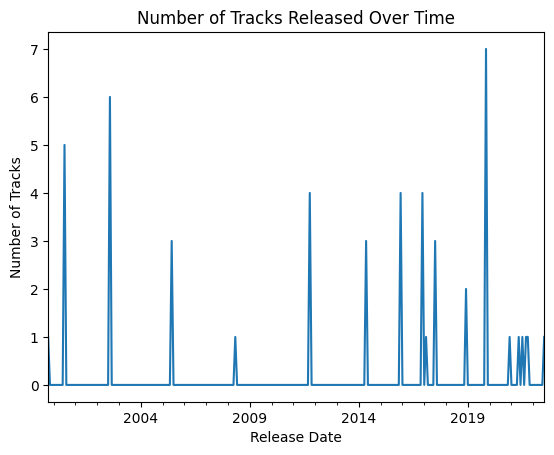

In [6]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Set 'release_date' as the index for time series analysis
df.set_index('release_date', inplace=True)

# Example: Plotting the number of tracks released over time
df.resample('M').size().plot()
plt.title('Number of Tracks Released Over Time')
plt.xlabel('Release Date')
plt.ylabel('Number of Tracks')
plt.show()


In [45]:
# Summarize information
average_duration = df["duration_ms"].mean()
most_recent_release = df["release_date"].max()
tracks_per_artist = df["artist_name"].value_counts()
tracks_per_album = df["album_name"].value_counts()
track_duration_distribution = df["duration_ms"].describe()

# Print the extended summary
print(f"Average Duration of Tracks: {average_duration:.2f} ms")
print(f"Most Recent Release Date: {most_recent_release}")
print("\nNumber of Tracks per Artist:")
print(tracks_per_artist)
print("\nNumber of Tracks per Album:")
print(tracks_per_album)
print("\nTrack Duration Distribution:")
print(track_duration_distribution)

Average Duration of Tracks: 267496.94 ms
Most Recent Release Date: 2022-07-06

Number of Tracks per Artist:
Coldplay            49
The Chainsmokers     1
Name: artist_name, dtype: int64

Number of Tracks per Album:
Everyday Life                                7
A Rush of Blood to the Head                  6
Parachutes                                   5
Mylo Xyloto                                  4
A Head Full of Dreams                        4
Live from Spotify London                     4
X&Y                                          3
Kaleidoscope EP                              3
Ghost Stories                                3
Live in Buenos Aires                         2
Higher Power                                 1
Music Of The Spheres                         1
Something Just Like This                     1
Viva La Vida or Death and All His Friends    1
Flags                                        1
Coloratura                                   1
My Universe                      

In [47]:
# Group by artist and provide summary statistics
grouped_by_artist = df.groupby("artist_name")
summary_by_artist = grouped_by_artist.agg({
    "duration_ms": ["mean", "std", "min", "max", "count"],
    "release_date": "max"  # Assuming you want the latest release date
})

# Print the summary by artist
print("\nSummary Statistics by Artist:")
print(summary_by_artist)


Summary Statistics by Artist:
                    duration_ms                                      \
                           mean           std     min     max count   
artist_name                                                           
Coldplay          267902.469388  72292.383361  146946  618960    49   
The Chainsmokers  247626.000000           NaN  247626  247626     1   

                 release_date  
                          max  
artist_name                    
Coldplay           2022-07-06  
The Chainsmokers   2017-02-22  


In [8]:
import requests
import json
import pandas as pd

def get_playlist_data(playlist_id, access_token):
    playlist_url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
    headers = {"Authorization": f"Bearer {access_token}"}
    playlist_response = requests.get(playlist_url, headers=headers)
    playlist_data = playlist_response.json()
    return playlist_data

def process_playlist_data(playlist_data):
    tracks = playlist_data.get("items", [])

    json_data_list = []
    for track in tracks:
        track_data = {
            "track_name": track["track"]["name"],
            "artist_name": track["track"]["artists"][0]["name"],
            "album_name": track["track"]["album"]["name"],
            "release_date": track["track"]["album"]["release_date"],
            "duration_ms": track["track"]["duration_ms"],
            # Add more fields as needed
        }
        json_data_list.append(track_data)

    df = pd.DataFrame(json_data_list)
    return df

def print_summary_data(df):
    average_duration = df["duration_ms"].mean()
    most_recent_release = df["release_date"].max()
    tracks_per_artist = df["artist_name"].value_counts()
    tracks_per_album = df["album_name"].value_counts()
    track_duration_distribution = df["duration_ms"].describe()

    print(f"Average Duration of Tracks: {average_duration:.2f} ms")
    print(f"Most Recent Release Date: {most_recent_release}")
    print("\nNumber of Tracks per Artist:")
    print(tracks_per_artist)
    print("\nNumber of Tracks per Album:")
    print(tracks_per_album)
    print("\nTrack Duration Distribution:")
    print(track_duration_distribution)

# Replace these with your actual playlist IDs
playlist_id_1 = "37i9dQZF1DXcISkz62UgzG"
playlist_id_2 = "37i9dQZF1E4AfEUiirXPyP"

# Get access tokens for both playlists
token_url = "https://accounts.spotify.com/api/token"
token_params = {"grant_type": "client_credentials"}

token_response_1 = requests.post(token_url, auth=(client_id, client_secret), data=token_params)
token_data_1 = token_response_1.json()
access_token_1 = token_data_1["access_token"]

token_response_2 = requests.post(token_url, auth=(client_id, client_secret), data=token_params)
token_data_2 = token_response_2.json()
access_token_2 = token_data_2["access_token"]

# Get playlist data for both playlists
playlist_data_1 = get_playlist_data(playlist_id_1, access_token_1)
playlist_data_2 = get_playlist_data(playlist_id_2, access_token_2)

# Process playlist data
df_1 = process_playlist_data(playlist_data_1)
df_2 = process_playlist_data(playlist_data_2)

# Print summary data for both playlists
print("Summary for Playlist 1:")
print_summary_data(df_1)

print("\n----------------------------------------\n")

print("Summary for Playlist 2:")
print_summary_data(df_2)


Summary for Playlist 1:
Average Duration of Tracks: 198643.57 ms
Most Recent Release Date: 2023-08-25

Number of Tracks per Artist:
Selena Gomez                35
Selena Gomez & The Scene     5
DJ Snake                     2
Rema                         1
Charlie Puth                 1
Kygo                         1
Coldplay                     1
BLACKPINK                    1
Zedd                         1
benny blanco                 1
Trevor Daniel                1
Cashmere Cat                 1
Name: artist_name, dtype: int64

Number of Tracks per Album:
Rare (Deluxe)                                                       10
Revival (Deluxe)                                                     8
Revelación - EP                                                      4
A Year Without Rain                                                  2
When The Sun Goes Down                                               2
Stars Dance (Bonus Track Version)                                    2
True Colo

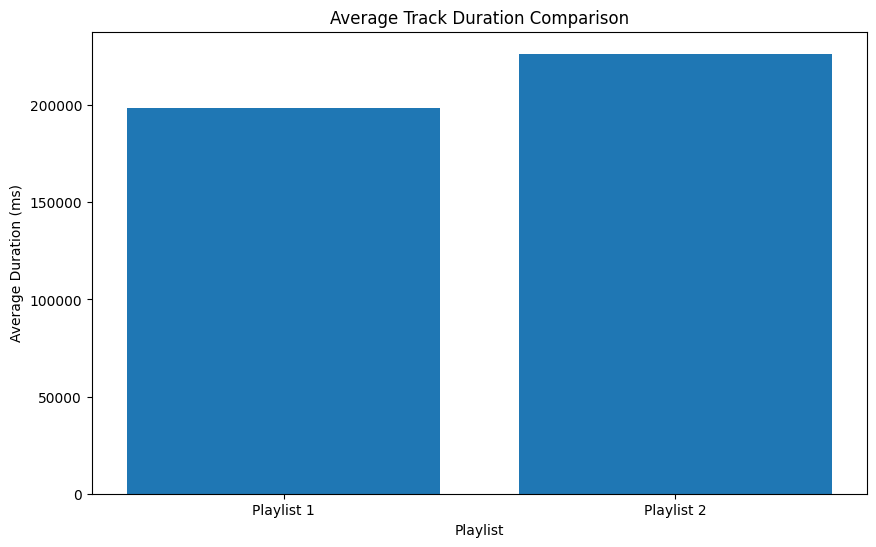

In [77]:
import matplotlib.pyplot as plt

# Compare average track duration using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Playlist 1', 'Playlist 2'], [df_1["duration_ms"].mean(), df_2["duration_ms"].mean()])
plt.title('Average Track Duration Comparison')
plt.xlabel('Playlist')
plt.ylabel('Average Duration (ms)')
plt.show()

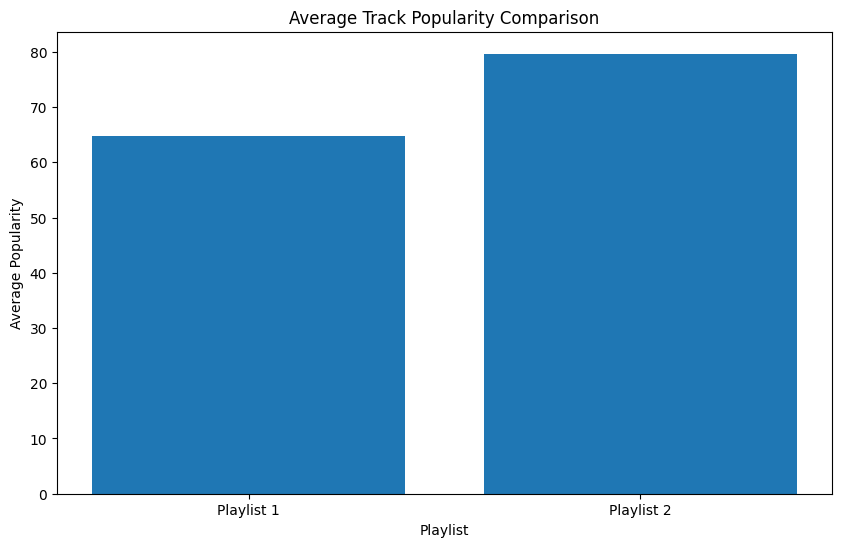

In [78]:
# Function to get popularity for each track
def get_popularity(playlist_data):
    tracks = playlist_data.get("items", [])
    popularity_list = [track["track"]["popularity"] for track in tracks]
    return popularity_list

# Process playlist data
df_1 = process_playlist_data(playlist_data_1)
df_2 = process_playlist_data(playlist_data_2)

# Get popularity for each track in both playlists
popularity_1 = get_popularity(playlist_data_1)
popularity_2 = get_popularity(playlist_data_2)

# Compare popularity using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Playlist 1', 'Playlist 2'], [sum(popularity_1) / len(popularity_1), sum(popularity_2) / len(popularity_2)])
plt.title('Average Track Popularity Comparison')
plt.xlabel('Playlist')
plt.ylabel('Average Popularity')
plt.show()

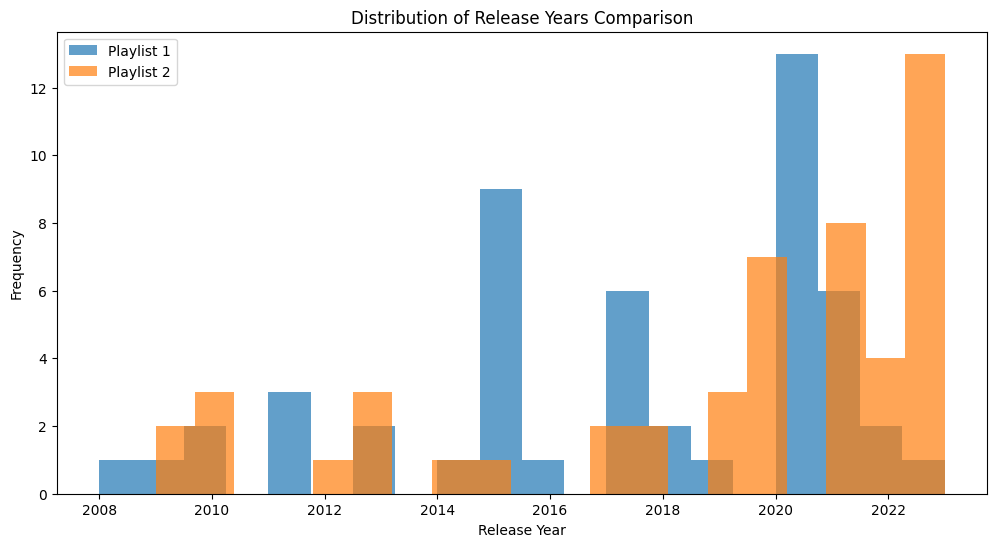

In [9]:
# Extract release years from the 'release_date' column
df_1['release_year'] = pd.to_datetime(df_1['release_date']).dt.year
df_2['release_year'] = pd.to_datetime(df_2['release_date']).dt.year

# Compare the distribution of release years using histograms
plt.figure(figsize=(12, 6))
plt.hist(df_1['release_year'], bins=20, alpha=0.7, label='Playlist 1')
plt.hist(df_2['release_year'], bins=20, alpha=0.7, label='Playlist 2')
plt.title('Distribution of Release Years Comparison')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()
